## CNN Project - Part 1

### 1. Importing the data

In [5]:
from zipfile import ZipFile
with ZipFile('plant-seedling-classification.zip', 'r') as z:
  z.extractall()

Generating training data

- Reading the images
- Resizing the image to 128 x 128
- Getting the image labels from the folder name

In [7]:
import os
import cv2

X_train = []
y_train = []

# listing all folders inside train directory
for i in os.listdir('train'):
    print(i)          
    for j in os.listdir('train/' + i):
      # read each image inside train directory one by one
      dummy = cv2.imread('train/' + i + "/" + j)
      dummy = cv2.resize(dummy, (128, 128))
      X_train.append(dummy)
      y_train.append(i)

Black-grass
Charlock
Cleavers
Common Chickweed
Common wheat
Fat Hen
Loose Silky-bent
Maize
Scentless Mayweed
Shepherds Purse
Small-flowered Cranesbill
Sugar beet


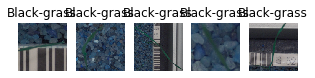

In [8]:
# Looking at first 5 images in the dataset and their labels

# Visualization
import matplotlib.pyplot as plt 
import seaborn as sns

# Number of images we want to see
N=5  

plt.figure(figsize=(N, 1))
for i in range(N):
    plt.subplot(1, N, i+1)
    plt.imshow(X_train[i], cmap="gray")  # greens, reds, blues, rgb
    plt.title("{}".format(y_train[i]))
    plt.axis('off')
plt.show()

### 2. Training, tuning and testing image classifier model

In [9]:
from sklearn.model_selection import train_test_split

X_train_ML, X_val_ML, y_train_ML, y_val_ML = train_test_split(X_train, y_train, test_size=0.2, random_state=2)

print(len(X_train_ML))
print(len(X_val_ML))

3813
954


In [10]:
import numpy as np

X_train = np.array(X_train_ML)
X_train.shape

(3813, 128, 128, 3)

In [11]:
import numpy as np

X_test = np.array(X_val_ML)
X_test.shape

(954, 128, 128, 3)

In [12]:
X_train[0]

array([[[ 49,  65,  81],
        [ 30,  51,  72],
        [ 32,  88,  81],
        ...,
        [ 17,  44,  78],
        [ 25,  89,  90],
        [ 21, 102,  80]],

       [[ 46,  63,  79],
        [ 51,  67,  86],
        [ 44,  92,  87],
        ...,
        [ 20, 100,  84],
        [ 24, 107,  87],
        [ 33, 109,  88]],

       [[ 31,  48,  67],
        [ 37,  56,  73],
        [ 39,  71,  73],
        ...,
        [ 32, 101,  82],
        [ 26,  98,  76],
        [ 20,  94,  75]],

       ...,

       [[ 55,  68,  84],
        [ 47,  61,  76],
        [ 41,  51,  70],
        ...,
        [ 37,  65,  89],
        [ 39,  71,  84],
        [ 60,  89,  88]],

       [[ 22,  20,  27],
        [ 24,  29,  41],
        [ 39,  44,  58],
        ...,
        [ 40,  66,  85],
        [ 56,  96,  86],
        [ 52,  89,  84]],

       [[ 32,  32,  40],
        [ 24,  26,  29],
        [ 24,  26,  39],
        ...,
        [ 42,  76,  79],
        [ 42,  84,  74],
        [ 48,  86,  78]]

In [13]:
X_test[0]

array([[[124, 140, 151],
        [121, 139, 150],
        [116, 136, 147],
        ...,
        [ 28,  48,  74],
        [ 28,  48,  74],
        [ 54,  71,  94]],

       [[125, 141, 152],
        [122, 141, 150],
        [125, 145, 152],
        ...,
        [ 27,  47,  75],
        [ 43,  63,  89],
        [ 61,  80, 103]],

       [[118, 136, 147],
        [123, 142, 150],
        [124, 144, 151],
        ...,
        [ 39,  60,  88],
        [ 50,  72,  97],
        [ 57,  80, 103]],

       ...,

       [[ 24,  47,  77],
        [ 19,  42,  72],
        [ 20,  43,  71],
        ...,
        [ 78,  96, 111],
        [ 78,  95, 110],
        [ 79,  96, 110]],

       [[ 30,  57,  87],
        [ 27,  53,  84],
        [ 25,  50,  81],
        ...,
        [ 80,  98, 112],
        [ 73,  91, 107],
        [ 75,  91, 107]],

       [[ 32,  62,  93],
        [ 29,  58,  90],
        [ 28,  55,  88],
        ...,
        [ 80,  98, 112],
        [ 68,  86, 102],
        [ 71,  87, 104]]

In [15]:
train_X = X_train.astype('float32')
train_X = X_train.reshape(X_train.shape[0],128,128,3)
train_X = X_train / 255.

test_X = X_test.astype('float32')
test_X = X_test.reshape(X_test.shape[0], 128,128,3)
test_X = X_test / 255.

#Training Data
print('\nTraining data : ', train_X.shape)  

#Testing Data
print('\nTesting data : ', test_X.shape)


Training data :  (3813, 128, 128, 3)

Testing data :  (954, 128, 128, 3)


In [16]:
# Flattening the image data 

# Training data
x_train = []
for i in range(1000):
    x_train.append(train_X[i,:].flatten())

# Testing data
x_test = []
for i in range(500):
    x_test.append(test_X[i,:].flatten())

train_Y=y_train_ML[0:1000]
test_Y=y_val_ML[0:500]

# Printing data lengths

print("\n Training data:",len(x_train))
print("\n Training Target data:",len(train_Y))
print("\n Testing data:",len(x_test))
print("\n Testing Target data:",len(test_Y))


 Training data: 1000

 Training Target data: 1000

 Testing data: 500

 Testing Target data: 500


In [17]:
# Logistic Regression

from sklearn. linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from sklearn.neighbors import KNeighborsClassifier


LogR = LogisticRegression()
LogR.fit(x_train, train_Y)

y_pred=LogR.predict(x_train)
LogR_Accuracy_Train = accuracy_score(y_true=train_Y, y_pred=y_pred)
print("Train Accuracy : ", LogR_Accuracy_Train)

y_pred = LogR.predict(x_test)
LogR_Accuracy_Test = accuracy_score(y_true=test_Y, y_pred=y_pred)
print("Test Accuracy : ", LogR_Accuracy_Test)

C:\Users\nipgupta\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Train Accuracy :  1.0
Test Accuracy :  0.358


In [18]:
# NB - Finding the best NBs kernels

from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB

k=[BernoulliNB,GaussianNB]
for i in range (len(k)):
    NB_Classifier = k[i]()
    NB_Classifier.fit(x_train, train_Y)
    print ('kernel is =',k[i], '\tScore=',NB_Classifier.score(x_test, test_Y))

kernel is = <class 'sklearn.naive_bayes.BernoulliNB'> 	Score= 0.138
kernel is = <class 'sklearn.naive_bayes.GaussianNB'> 	Score= 0.184


In [19]:
# NB - Model

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

NB = GaussianNB()
NB.fit(x_train, train_Y)

y_pred = NB.predict(x_train)
NB_Accuracy_Train=accuracy_score(train_Y, y_pred, normalize = True)
print("Train Accuracy: ", NB_Accuracy_Train)

y_pred = NB.predict(x_test)
NB_Accuracy_Test=accuracy_score(test_Y, y_pred, normalize = True)
print("Test Accuracy : ", NB_Accuracy_Test)

Train Accuracy:  0.286
Test Accuracy :  0.184


In [20]:
# SVM - Model
from sklearn.svm import SVC
SVM = SVC(C=0.9,kernel='linear')
SVM.fit(x_train, train_Y)

SVM_Accuracy=SVM.score(x_train, train_Y)
print("Train Accuracy : ", SVM_Accuracy)

SVM_Accuracy=SVM.score(x_test, test_Y)
print("Test Accuracy : ", SVM_Accuracy)

Train Accuracy :  1.0
Test Accuracy :  0.408


In [21]:
# KNN - Model

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

KNN = KNeighborsClassifier(n_neighbors=19)
KNN.fit(x_train, train_Y)

y_pred = KNN.predict(x_train)
KNN_Accuracy_Train=accuracy_score(train_Y, y_pred)
print("Train Accuracy : ", KNN_Accuracy_Train)

y_pred = KNN.predict(x_test)
KNN_Accuracy_Test=accuracy_score(test_Y, y_pred)
print("Test Accuracy : ", KNN_Accuracy_Test)

Train Accuracy :  0.346
Test Accuracy :  0.192


In [22]:
# Decision Tree

# Library
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix

# Model
model_DT=DecisionTreeClassifier(criterion='entropy',
                                splitter='best',
                                max_depth=5,
                                min_samples_split=2,
                                min_samples_leaf=1,
                                min_weight_fraction_leaf=0.0,
                                max_features=None,
                                random_state=None,
                                max_leaf_nodes=None,
                                min_impurity_decrease=0.0,
                                min_impurity_split=None,
                                class_weight=None,
                                presort='deprecated',
                                ccp_alpha=0.0,)

model_DT.fit(x_train, train_Y)

# Accuracy
DT_Train=model_DT.score(x_train, train_Y)
DT_Test=model_DT.score(x_test, test_Y)

# Output
print("Train Accuracy:",DT_Train)
print("Test Accuracy:",DT_Test)

Train Accuracy: 0.452
Test Accuracy: 0.214


In [23]:
# Random Forest

# Importing requried libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Model
model_RF = RandomForestClassifier(n_estimators=20,
                                    criterion='gini',
                                    max_depth=None,
                                    min_samples_split=2,
                                    min_samples_leaf=1,
                                    min_weight_fraction_leaf=0.0,
                                    max_features='auto',
                                    max_leaf_nodes=None,
                                    min_impurity_decrease=0.0,
                                    min_impurity_split=None,
                                    bootstrap=True,
                                    oob_score=False,
                                    n_jobs=None,
                                    random_state=None,
                                    verbose=0,
                                    warm_start=False,
                                    class_weight=None,
                                    ccp_alpha=0.0,
                                    max_samples=None,)
model_RF.fit(x_train, train_Y)

# Accuracy
pred_RF = model_RF.predict(x_test)
RF_Train = model_RF.score(x_train, train_Y)
RF_Test = accuracy_score(test_Y, pred_RF)   

# Output
print("Train Accuracy:",RF_Train)
print("Test Accuracy:",RF_Test)

Train Accuracy: 1.0
Test Accuracy: 0.33


In [24]:
# ADA Boosting

# Importing required libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

# Model
model = AdaBoostClassifier( base_estimator=None,    # SVC(), RandomForestClassifier(), GradientBoostingClassifier()
                            n_estimators=10,
                            learning_rate=1.0,
                            algorithm='SAMME.R',     # try using SVC() as base estimator above
                            random_state=None,)
model_AB = model.fit(x_train, train_Y)

# Accuracy
AB_Train = model_AB.score(x_train, train_Y)
pred_AB =model_AB.predict(x_test)
acc_AB = accuracy_score(test_Y, pred_AB)

print("Train Accuracy:",AB_Train)
print("Test Accuracy:",acc_AB)

Train Accuracy: 0.229
Test Accuracy: 0.172


In [25]:
# Gradient Boosting


# Library
from sklearn.ensemble import GradientBoostingClassifier

# Model
model = GradientBoostingClassifier(loss='deviance',
                                    learning_rate=0.1,
                                    n_estimators=10,
                                    subsample=1.0,
                                    criterion='friedman_mse',
                                    min_samples_split=2,
                                    min_samples_leaf=1,
                                    min_weight_fraction_leaf=0.0,
                                    max_depth=3,
                                    min_impurity_decrease=0.0,
                                    min_impurity_split=None,
                                    init=None,
                                    random_state=None,
                                    max_features=None,
                                    verbose=1,
                                    max_leaf_nodes=None,
                                    warm_start=False,
                                    presort='deprecated',
                                    validation_fraction=0.1,
                                    n_iter_no_change=None,
                                    tol=0.0001,
                                    ccp_alpha=0.0)
model_GB = model.fit(x_train, train_Y)

# Accuracy
GB_Train = model_GB.score(x_train, train_Y)
pred_GB =model_GB.predict(x_test)
acc_GB = accuracy_score(test_Y, pred_GB)

print("Training Accuracy:",GB_Train)
print("Testing Accuracy:",acc_GB)

      Iter       Train Loss   Remaining Time 
         1        2061.2709           23.54m
         2        1852.9230           22.02m
         3        1685.7844           19.19m
         4        1534.5577           17.53m
         5        1417.9312           14.58m
         6        1305.6060           11.64m
         7        1196.0427            8.81m
         8        1110.7740            5.98m
         9        1032.2801            3.01m
        10         963.5787            0.00s
Training Accuracy: 0.926
Testing Accuracy: 0.342


In [27]:
# Comparison table
import pandas as pd

Comparison1 = pd.DataFrame({'Method':['Logistic Regression'], 'Train accuracy': LogR_Accuracy_Train, 
                           'Test accuracy': LogR_Accuracy_Test})
Comparison1 = Comparison1[['Method', 'Train accuracy', 'Test accuracy']]


Comparison2 = pd.DataFrame({'Method':['Naive Bayes Regression'], 'Train accuracy': NB_Accuracy_Train, 
                           'Test accuracy': NB_Accuracy_Test},)
Comparison2 = Comparison2[['Method', 'Train accuracy', 'Test accuracy']]


Comparison3 = pd.DataFrame({'Method':['KNN'], 'Train accuracy': KNN_Accuracy_Train, 
                           'Test accuracy': KNN_Accuracy_Test})
Comparison3 = Comparison3[['Method', 'Train accuracy', 'Test accuracy']]


Comparison4 = pd.DataFrame({'Method':['SVM'], 'Train accuracy': DT_Train, 
                           'Test accuracy': DT_Test})
Comparison4 = Comparison4[['Method', 'Train accuracy', 'Test accuracy']]


Comparison5 = pd.DataFrame({'Method':['Decision Tree'], 'Train accuracy': LogR_Accuracy_Train, 
                            'Test accuracy': LogR_Accuracy_Test})
Comparison5 = Comparison5[['Method', 'Train accuracy', 'Test accuracy']]



Comparison6 = pd.DataFrame({'Method':['Random Forest'], 'Train accuracy': RF_Train, 
                           'Test accuracy': RF_Test})
Comparison6 = Comparison6[['Method', 'Train accuracy', 'Test accuracy']]



Comparison7 = pd.DataFrame({'Method':['Gradient Boosting'], 'Train accuracy': GB_Train, 
                           'Test accuracy': acc_GB})
Comparison7 = Comparison7[['Method', 'Train accuracy', 'Test accuracy']]



Comparison8 = pd.DataFrame({'Method':['ADA Boosting'], 'Train accuracy': AB_Train, 
                           'Test accuracy': acc_AB})
Comparison8 = Comparison8[['Method', 'Train accuracy', 'Test accuracy']]

Comparison = pd.concat([Comparison1, Comparison2,Comparison3,Comparison4,Comparison5,Comparison6,
                        Comparison7,Comparison8])

Comparison

,Method,Train accuracy,Test accuracy
0,Logistic Regression,1.000,0.358
0,Naive Bayes Regression,0.286,0.184
0,KNN,0.346,0.192
0,SVM,0.452,0.214
0,Decision Tree,1.000,0.358
0,Random Forest,1.000,0.330
0,Gradient Boosting,0.926,0.342
0,ADA Boosting,0.229,0.172


### NN Image classifier

In [ ]:
from sklearn.model_selection import train_test_split

X_train_ML, X_val_ML, y_train_ML, y_val_ML = train_test_split(X_train, y_train, test_size=0.2, random_state=2)



In [ ]:
import numpy as np

X_train = np.array(X_train_ML)


In [ ]:
import numpy as np

X_test = np.array(X_val_ML)


In [ ]:
X_train = X_train.astype('float32')
X_train = X_train.reshape(X_train.shape[0], 49152) # 49152 = 128 * 128 * 3
X_train = X_train / 255

X_test = X_test.astype('float32')
X_test = X_test.reshape(X_test.shape[0], 49152)
X_test = X_test / 255


In [ ]:
from keras.utils import np_utils
import pandas as pd

# one hot encode outputs
y_train = pd.get_dummies(y_train_ML)
y_test = pd.get_dummies(y_val_ML)

# no.of classes
num_classes = y_test.shape[1]
num_hidden = 10

In [ ]:
from sklearn.preprocessing import StandardScaler

# Scaling train data
X_train = StandardScaler().fit_transform(X_train) 

# Scaling test data
X_test = StandardScaler().fit_transform(X_test)     

In [ ]:
### defining model
import keras
from keras import losses
from keras import optimizers
from keras.layers import Dropout, MaxPooling2D
from keras.layers import BatchNormalization
from keras.models import Sequential
from keras.layers import Dense, Activation


# creating model
model = Sequential()  
model.add(BatchNormalization(input_shape = (49152,)))  ### Batch_Norm Layer
    
model.add(Dense(256, activation='relu')) ###Multiple Dense units with Relu activation
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
    
# Compiling model
adam = optimizers.Adam(lr=1e-3)
model.compile(loss=losses.categorical_crossentropy, optimizer=adam, metrics=['accuracy']) ### Loss function = Categorical cross entropy

# Fitting the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=20, verbose=1)

### CNN Image classifier

In [3]:
from sklearn.model_selection import train_test_split


X_train_CNN, X_val_CNN, y_train_CNN, y_val_CNN = train_test_split(X_train, y_train, test_size=0.2, random_state=2)

print(len(X_train_CNN))
print(len(X_val_CNN))

3800
950


In [4]:
import pandas as pd

y_train = pd.get_dummies(y_train_CNN).values
import numpy as np

X_train = np.array(X_train_CNN)

In [5]:
# Data Set Shape & Size

#Training Data
print('\nTraining data : ', X_train.shape, y_train.shape)



Training data :  (3800, 128, 128, 3) (3800, 12)


In [6]:
y_train[2]


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], dtype=uint8)

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=2)

print(len(X_train))
print(len(X_val))

3040
760


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, Dropout, Dense, Flatten, BatchNormalization, MaxPooling2D

# model architecture building
model = Sequential()

model.add(BatchNormalization(input_shape = (128, 128, 3)))

model.add(Convolution2D(filters = 32, kernel_size = 3, activation ='relu', input_shape = (128, 128, 3))) 
model.add(MaxPooling2D(pool_size = 2))

model.add(Convolution2D(filters = 64, kernel_size = 4, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))

model.add(Convolution2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))

model.add(Convolution2D(filters = 128, kernel_size = 2, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))

model.add(Flatten()) 

# fully connected layer
model.add(Dense(units = 128,activation = 'relu'))
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dense(units = 32, activation = 'relu'))

model.add(Dense(units = 12, activation = 'softmax')) 

In [9]:
from tensorflow.keras.optimizers import Adam

optimizer = Adam(lr=0.001)
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 128, 128, 3)       12        
_________________________________________________________________
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 63, 63, 64)        32832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 31, 31, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 128)       0

In [30]:
model.fit(X_train, y_train, epochs = 10, validation_data = (X_val, y_val), initial_epoch=0)

Train on 3040 samples, validate on 760 samples
Epoch 1/10
3040/3040 [==============================] - 40s 13ms/sample - loss: 0.4543 - acc: 0.8401 - val_loss: 0.7019 - val_acc: 0.7987
Epoch 2/10
3040/3040 [==============================] - 42s 14ms/sample - loss: 0.3523 - acc: 0.8701 - val_loss: 0.7129 - val_acc: 0.7737
Epoch 3/10
3040/3040 [==============================] - 43s 14ms/sample - loss: 0.3276 - acc: 0.8849 - val_loss: 0.9789 - val_acc: 0.7526
Epoch 4/10
3040/3040 [==============================] - 41s 14ms/sample - loss: 0.3065 - acc: 0.8865 - val_loss: 0.7627 - val_acc: 0.7855
Epoch 5/10
3040/3040 [==============================] - 42s 14ms/sample - loss: 0.2334 - acc: 0.9161 - val_loss: 1.0285 - val_acc: 0.7579
Epoch 6/10
3040/3040 [==============================] - 44s 14ms/sample - loss: 0.2213 - acc: 0.9220 - val_loss: 0.8587 - val_acc: 0.8039
Epoch 7/10
3040/3040 [==============================] - 46s 15ms/sample - loss: 0.1480 - acc: 0.9447 - val_loss: 0.9457 - val

In [31]:
scores = model.evaluate(X_val, y_val)
print('Loss: {}, Accuracy: {}'.format(scores[0], scores[1]))

760/760 [==============================] - 2s 3ms/sample - loss: 0.8995 - acc: 0.7882
Loss: 0.8994667887687683, Accuracy: 0.7881578803062439


### 3. Comparing the results from the above step:

- CNN performs the best out of all of the above trained models.

### 4. Pickling the best performing  model.

In [37]:
from keras.models import model_from_json
import numpy
import os

# Pickle model to JSON
CNN_model_json =model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(CNN_model_json)
# Pickle weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


### 5. Importing the the image in the “ Prediction” folder to predict the class. Displaying the image and using the CNN image classifier model to predict the class.

In [32]:
import os
import cv2
import numpy as np

Predict_Image = []

# reading each image inside train directory one by one
P = cv2.imread('Prediction/Predict.png')
P = cv2.resize(P, (128, 128))
Predict_Image.append(dummy)

PI=np.array(Predict_Image)

Predict_Image=PI.reshape(1,128,128,3)

In [33]:
Predict_Image

array([[[[ 58,  77,  92],
         [ 64,  77,  91],
         [ 66,  79,  93],
         ...,
         [ 63,  92, 111],
         [ 74, 100, 119],
         [ 56,  78, 104]],

        [[ 53,  69,  85],
         [ 59,  74,  87],
         [ 56,  69,  85],
         ...,
         [ 65,  91, 110],
         [ 76, 100, 120],
         [ 60,  84, 107]],

        [[ 52,  67,  79],
         [ 35,  51,  69],
         [ 24,  35,  58],
         ...,
         [ 75,  94, 114],
         [ 76,  95, 112],
         [ 68,  87, 107]],

        ...,

        [[ 92, 111, 121],
         [ 85, 104, 118],
         [ 60,  81, 100],
         ...,
         [ 55,  88, 110],
         [ 46,  78,  99],
         [ 38,  57,  76]],

        [[ 62,  83,  98],
         [ 62,  79,  93],
         [ 60,  78,  96],
         ...,
         [ 52,  84, 103],
         [ 33,  48,  75],
         [ 43,  53,  73]],

        [[ 66,  82,  95],
         [ 72,  87, 100],
         [ 63,  80,  97],
         ...,
         [ 49,  83,  90],
        

In [33]:
from PIL import Image  
  
# creating a object  
im = Image.open(r"Predict.png")  

im.show() 

In [35]:
result=model.predict(Predict_Image)
result

array([[1.2176034e-09, 4.7613335e-06, 2.0912092e-03, 3.9062914e-05,
        6.5876549e-08, 3.5197480e-04, 1.8670006e-08, 9.9738759e-01,
        3.3079828e-06, 7.3715542e-05, 1.9673474e-08, 4.8236994e-05]],
      dtype=float32)

In [36]:
np.argmax(result) 

7

- Image belongs to the class "Maize"

- CNNs eliminate the need for manual feature extraction, one doesn’t need to select features required to classify the images. Since CNNs work is by extracting features directly from images and the key features are not pretrained; they are learned while the network trains on a collection of images. The automated feature extraction makes CNNs highly suited for and accurate for the tasks in computer vision such as object/image classification.